# USA Real Estate


Fuente: https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset


In [27]:
from pathlib import Path
import json
import csv
import time
import re

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns


%matplotlib inline

## Configuración

In [28]:
data_folder = Path().cwd().parent / 'data' / 'house_pricing'

csv_file = data_folder / 'realtor-data.csv'

print(f'Folder {data_folder} existe: {data_folder.exists()}')

Folder /home/luiscberrocal/PycharmProjects/pylearn-data-101/data/house_pricing existe: True


## Carga de datos

In [29]:
# %timeit df = pd.read_csv(csv_file)
df = pd.read_csv(csv_file, engine='pyarrow', dtype_backend='pyarrow')
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,<NA>
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,<NA>
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,<NA>
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,<NA>
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,<NA>,<NA>


### Shape

Filas y columnas

In [30]:
print(f'Filas {df.shape[0]} Columnas: {df.shape[1]}')

Filas 733159 Columnas: 12


### Info

Nombre y tipo de columnas

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 733159 entries, 0 to 733158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype               
---  ------        --------------   -----               
 0   status        733159 non-null  string[pyarrow]     
 1   price         733088 non-null  double[pyarrow]     
 2   bed           617177 non-null  double[pyarrow]     
 3   bath          621407 non-null  double[pyarrow]     
 4   acre_lot      572378 non-null  double[pyarrow]     
 5   full_address  733159 non-null  string[pyarrow]     
 6   street        733159 non-null  string[pyarrow]     
 7   city          733159 non-null  string[pyarrow]     
 8   state         733159 non-null  string[pyarrow]     
 9   zip_code      732957 non-null  double[pyarrow]     
 10  house_size    520772 non-null  double[pyarrow]     
 11  sold_date     347237 non-null  date32[day][pyarrow]
dtypes: date32[day][pyarrow](1), double[pyarrow](6), string[pyarrow](5)
memory usage: 108.5

### Describe


In [32]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size,sold_date
count,7.330880e+05,617177.000000,621407.000000,572378.000000,732957.000000,5.207720e+05,347237
mean,7.257017e+05,3.422041,2.540473,19.058585,5736.101623,2.192527e+03,2008-11-08
min,0.000000e+00,1.000000,1.000000,0.000000,601.000000,1.000000e+02,1901-01-01
25%,2.375000e+05,2.000000,2.000000,0.140000,2492.000000,1.195000e+03,2002-08-26
50%,4.190000e+05,3.000000,2.000000,0.350000,6001.000000,1.714000e+03,2009-07-22
75%,7.250000e+05,4.000000,3.000000,1.380000,7928.000000,2.547250e+03,2017-10-12
max,8.750000e+08,123.000000,198.000000,100000.000000,99999.000000,1.450112e+06,2023-03-01
std,1.768769e+06,2.028735,2.002442,1022.007111,3764.935565,3.141461e+03,NaN


In [33]:
df['state'].value_counts()

state
New Jersey        191280
Massachusetts     175248
Connecticut        89776
New York           66088
New Hampshire      51394
Vermont            46460
Maine              36650
Rhode Island       29596
Puerto Rico        24679
Pennsylvania       17148
Virgin Islands      2573
Delaware            2135
Georgia               50
Virginia              31
South Carolina        25
Tennessee             20
Wyoming                3
West Virginia          3
Name: count, dtype: int64[pyarrow]

## Limpieza de datos

### Renombrar columnas

In [35]:
create_column_dict = True

if create_column_dict:
    column_dict = {}
    for col in df.columns:
        column_dict[col] = col
    column_mapping_file = data_folder / 'column_mapping.json'
    with open(column_mapping_file, 'w') as f:
        json.dump(column_dict, f)

In [36]:
column_dict = {
  "acre_lot": "Lot area (acres)",
  "full_address": "Full Address",
  "state": "estate",
  "zip_code": "Zip code",
  "house_size": "House size (square feet)",
}

In [39]:
df = df.rename(columns=column_dict)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 733159 entries, 0 to 733158
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype               
---  ------                    --------------   -----               
 0   status                    733159 non-null  string[pyarrow]     
 1   price                     733088 non-null  double[pyarrow]     
 2   bed                       617177 non-null  double[pyarrow]     
 3   bath                      621407 non-null  double[pyarrow]     
 4   Lot area (acres)          572378 non-null  double[pyarrow]     
 5   Full Address              733159 non-null  string[pyarrow]     
 6   street                    733159 non-null  string[pyarrow]     
 7   city                      733159 non-null  string[pyarrow]     
 8   estate                    733159 non-null  string[pyarrow]     
 9   Zip code                  732957 non-null  double[pyarrow]     
 10  House size (square feet)  520772 non-null  double[pyarrow]   

### Using map to rename states

In [41]:
us_state_file = Path.cwd() / 'us_states.json'

with open(us_state_file, 'r') as f:
    us_states = json.load(f)
    
print(us_states)

{'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}


In [43]:
df['estate']=df['estate'].map(us_states)

df['estate'].value_counts()

estate
NJ    191280
MA    175248
CT     89776
NY     66088
NH     51394
VT     46460
ME     36650
RI     29596
PA     17148
DE      2135
GA        50
VA        31
SC        25
TN        20
WY         3
WV         3
Name: count, dtype: int64

### Revisando los datos de los precios

<Axes: >

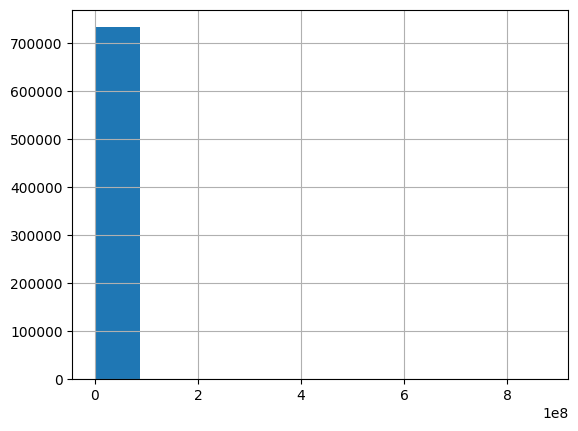

In [48]:
df['price'].hist()

#### Finding prices == 0.0 

In [50]:
zeros = df.loc[df['price'] == 0.0]

print(zeros.shape)

(39, 12)


In [51]:
zeros.head()

,status,price,bed,bath,Lot area (acres),Full Address,street,city,estate,Zip code,House size (square feet),sold_date
465599,for_sale,0.0,<NA>,<NA>,0.17,"535 E 29th St, Paterson, NJ, 07504",535 E 29th St,Paterson,NJ,7504.0,4500.0,<NA>
465600,for_sale,0.0,<NA>,<NA>,0.22,"541 E 29th St, Paterson, NJ, 07504",541 E 29th St,Paterson,NJ,7504.0,5000.0,<NA>
469243,for_sale,0.0,4.0,4.0,<NA>,"330 E 38th St Unit 35CD, New York, NY, 10016",330 E 38th St Unit 35CD,New York,NY,10016.0,<NA>,<NA>
472798,for_sale,0.0,<NA>,<NA>,0.17,"535 E 29th St, Paterson, NJ, 07504",535 E 29th St,Paterson,NJ,7504.0,4500.0,<NA>
472804,for_sale,0.0,<NA>,<NA>,0.22,"541 E 29th St, Paterson, NJ, 07504",541 E 29th St,Paterson,NJ,7504.0,5000.0,<NA>
